# Q: Is my 75+ grandpa in Olomouc or my grandpa in Prague in a bigger risk of dying from COVID-19?

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#How-many-cases-are-in-Olomouc?" data-toc-modified-id="How-many-cases-are-in-Olomouc?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many cases are in Olomouc?</a></span></li><li><span><a href="#How-many-cases-are-in-Prague?" data-toc-modified-id="How-many-cases-are-in-Prague?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How many cases are in Prague?</a></span></li><li><span><a href="#Visualise-both-in-one-graph" data-toc-modified-id="Visualise-both-in-one-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualise both in one graph</a></span></li><li><span><a href="#Adjust-the-numbers-by-population-size" data-toc-modified-id="Adjust-the-numbers-by-population-size-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Adjust the numbers by population size</a></span></li><li><span><a href="#Is-this-significantly-similar?-A:-Yes." data-toc-modified-id="Is-this-significantly-similar?-A:-Yes.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Is this significantly similar? A: Yes.</a></span></li></ul></div>

## Questions

**Q1: Where is he more likely to catch it? Answered: Equally likely in both cities! [this notebook]**<br>
Q2: If he caught it, where are people of 75+ more frequently hospitalised?<br>
Q3: If hospitalised, where are people of 75+ more frequently dying?<br>
<br>
Need the following data:<br>
* number of people in O and in P *(got it)*
* incidence in O and in P per number of people in the city *(got it)*
* number of hospitalised 75+ people in Olomouc and in Prague *(cannot get)*
* number of hospitalised people in Olomouc and in Prague *(got it)*
* number of hospitalised deaths in 75+ people in Olomouc and in Prague *(cannot get)*
* number of deaths in 75+ people in Olomouc and in Prague *(got it)*

Data source: https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19

TO DO:<br>
* Find out and resolve SettingWithCopy *(done)*
* Find out lau versus orp for exact population and correct *(done)*
* What is the '_7' and its significance? *(done)*

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# kod okresu
lau_Prg = 'CZ0100'
lau_Olo = 'CZ0712' 
# populace okresu
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0100 1117063
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0712 231742
pop_Prg = 1117063
pop_Olo = 231742

In [83]:
df = pd.read_csv('..\\00-source-data\\osoby.csv')
df = df.drop(columns=['nakaza_v_zahranici', 'nakaza_zeme_csu_kod', 'kraj_nuts_kod', 'pohlavi'])
df.head()

,datum,vek,okres_lau_kod
0,2020-08-13,46,CZ0100
1,2020-10-30,61,CZ0712
2,2020-03-30,48,CZ0522
3,2020-10-15,63,CZ0315
4,2020-08-06,15,CZ0204


In [84]:
df['okres_lau_kod'].nunique()

78

In [85]:
df['datum'].nunique()

244

In [86]:
len(df)

321922

In [87]:
df['vek'].nunique()

113

## How many cases are in Olomouc?

In [88]:
df_Olo = df.loc[df['okres_lau_kod'] == lau_Olo]
df_Olo.head()

,datum,vek,okres_lau_kod
1,2020-10-30,61,CZ0712
30,2020-10-29,47,CZ0712
65,2020-10-31,59,CZ0712
101,2020-08-19,20,CZ0712
124,2020-09-22,37,CZ0712


In [89]:
df_Olo = df_Olo.drop(columns=['okres_lau_kod'])
df_Olo.tail()

,datum,vek
321734,2020-03-30,21
321788,2020-10-30,20
321826,2020-10-05,21
321827,2020-10-05,21
321915,2020-10-16,29


In [90]:
df_Olo.dtypes

datum    object
vek       int64
dtype: object

In [91]:
df_Olo['datum'] = df_Olo['datum'].apply(pd.to_datetime)
df_Olo.dtypes

datum    datetime64[ns]
vek               int64
dtype: object

In [92]:
df_Olo_byDate = df_Olo.groupby('datum', as_index=False).count()
df_Olo_byDate.head()

,datum,vek
0,2020-03-08,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-13,2
4,2020-03-14,12


In [93]:
df_Olo_byDate = df_Olo_byDate.rename(columns={'vek':'number'})
df_Olo_byDate.tail()

,datum,number
177,2020-10-27,493
178,2020-10-28,252
179,2020-10-29,262
180,2020-10-30,289
181,2020-10-31,135


In [94]:
df_Olo_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

Text(0.5, 0, 'Datum')

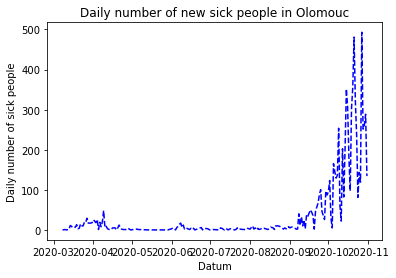

In [95]:
plt.plot(df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--')
plt.title('Daily number of new sick people in Olomouc')
plt.ylabel('Daily number of sick people')
plt.xlabel('Datum')

## How many cases are in Prague?

In [96]:
df_Prg = df.loc[df['okres_lau_kod'] == lau_Prg]
df_Prg = df_Prg.drop(columns=['okres_lau_kod'])
df_Prg['datum'] = df_Prg['datum'].apply(pd.to_datetime)

df_Prg_byDate = df_Prg.groupby('datum', as_index=False).count()
df_Prg_byDate = df_Prg_byDate.rename(columns={'vek':'number'})
df_Prg_byDate.head()

,datum,number
0,2020-03-01,2
1,2020-03-04,1
2,2020-03-06,8
3,2020-03-07,4
4,2020-03-09,4


In [97]:
df_Prg_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

Text(0.5, 0, 'Date')

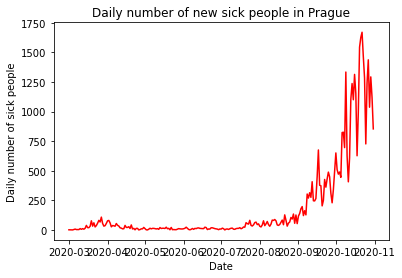

In [98]:
plt.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r')
plt.title('Daily number of new sick people in Prague')
plt.ylabel('Daily number of sick people')
plt.xlabel('Date')

## Visualise both in one graph

Text(0.5, 0, 'Date')

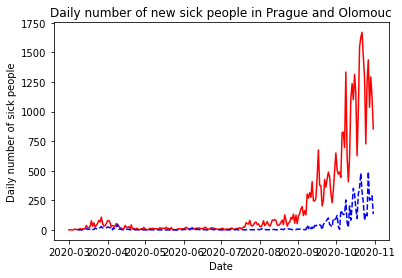

In [99]:
plt.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r', df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--')
plt.title('Daily number of new sick people in Prague and Olomouc')
plt.ylabel('Daily number of sick people')
plt.xlabel('Date')

plot with a legend:

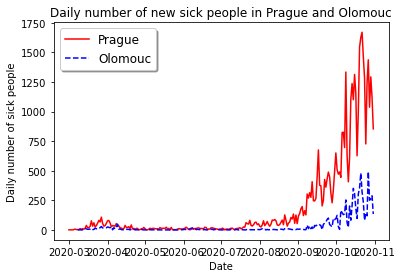

In [100]:
fig, ax = plt.subplots()
ax.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r', label='Prague')
ax.plot(df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

plt.title('Daily number of new sick people in Prague and Olomouc')
plt.xlabel('Date')
plt.ylabel('Daily number of sick people')

plt.show()

## Adjust the numbers by population size

In [101]:
df_Olo_byDate.head()

,datum,number
0,2020-03-08,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-13,2
4,2020-03-14,12


In [102]:
df_Olo_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

In [103]:
df_Olo_byDate['number_adjusted'] = df_Olo_byDate['number'] / pop_Olo
df_Olo_byDate.head()

,datum,number,number_adjusted
0,2020-03-08,1,0.000004
1,2020-03-10,2,0.000009
2,2020-03-11,1,0.000004
3,2020-03-13,2,0.000009
4,2020-03-14,12,0.000052


In [104]:
df_Prg_byDate['number_adjusted'] = df_Prg_byDate['number'] / pop_Prg
df_Prg_byDate.head()

,datum,number,number_adjusted
0,2020-03-01,2,1.790409e-06
1,2020-03-04,1,8.952047e-07
2,2020-03-06,8,7.161637e-06
3,2020-03-07,4,3.580819e-06
4,2020-03-09,4,3.580819e-06


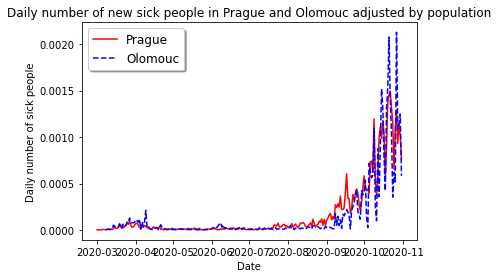

In [105]:
fig, ax = plt.subplots()
ax.plot(df_Prg_byDate['datum'], df_Prg_byDate['number_adjusted'], 'r', label='Prague')
ax.plot(df_Olo_byDate['datum'], df_Olo_byDate['number_adjusted'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

plt.title('Daily number of new sick people in Prague and Olomouc adjusted by population')
plt.xlabel('Date')
plt.ylabel('Daily number of sick people')

plt.show()

## Is this significantly similar? A: Yes.

In [106]:
print(len(df_Prg_byDate.index), len(df_Olo_byDate.index))

241 182


In [107]:
df_Olo_byDate = df_Olo_byDate.rename(columns={'number':'number_Olo', 'number_adjusted':'number_adjusted_Olo'})
df_Olo_byDate.head()

,datum,number_Olo,number_adjusted_Olo
0,2020-03-08,1,0.000004
1,2020-03-10,2,0.000009
2,2020-03-11,1,0.000004
3,2020-03-13,2,0.000009
4,2020-03-14,12,0.000052


In [108]:
df_Prg_byDate = df_Prg_byDate.rename(columns={'number':'number_Prg', 'number_adjusted':'number_adjusted_Prg'})
df_Prg_byDate.head()

,datum,number_Prg,number_adjusted_Prg
0,2020-03-01,2,1.790409e-06
1,2020-03-04,1,8.952047e-07
2,2020-03-06,8,7.161637e-06
3,2020-03-07,4,3.580819e-06
4,2020-03-09,4,3.580819e-06


In [109]:
df_merged = pd.concat([df_Prg_byDate, df_Olo_byDate], axis=1, sort=False)

df_merged.head()

,datum,number_Prg,number_adjusted_Prg,datum,number_Olo,number_adjusted_Olo
0,2020-03-01,2,1.790409e-06,2020-03-08,1.0,0.000004
1,2020-03-04,1,8.952047e-07,2020-03-10,2.0,0.000009
2,2020-03-06,8,7.161637e-06,2020-03-11,1.0,0.000004
3,2020-03-07,4,3.580819e-06,2020-03-13,2.0,0.000009
4,2020-03-09,4,3.580819e-06,2020-03-14,12.0,0.000052


In [110]:
len(df_merged)

241

In [111]:
df_merged.isnull().sum()

datum                   0
number_Prg              0
number_adjusted_Prg     0
datum                  59
number_Olo             59
number_adjusted_Olo    59
dtype: int64

In [112]:
df_merged.corr()

,number_Prg,number_adjusted_Prg,number_Olo,number_adjusted_Olo
number_Prg,1.000000,1.000000,0.562583,0.562583
number_adjusted_Prg,1.000000,1.000000,0.562583,0.562583
number_Olo,0.562583,0.562583,1.000000,1.000000
number_adjusted_Olo,0.562583,0.562583,1.000000,1.000000


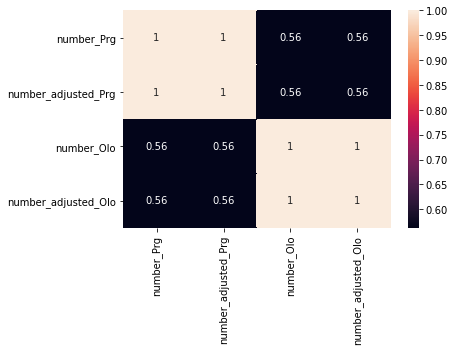

In [113]:
import seaborn as sn
corrMatrix = df_merged.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [114]:
df_merged_clean = df_merged[['number_adjusted_Prg', 'number_adjusted_Olo']]
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,1.790409e-06,0.000004
1,8.952047e-07,0.000009
2,7.161637e-06,0.000004
3,3.580819e-06,0.000009
4,3.580819e-06,0.000052
5,1.074246e-05,0.000043
6,5.371228e-06,0.000026
7,1.074246e-05,0.000035
8,6.266433e-06,0.000060
9,1.342807e-05,0.000017


In [115]:
df_merged_clean.corr()

,number_adjusted_Prg,number_adjusted_Olo
number_adjusted_Prg,1.000000,0.562583
number_adjusted_Olo,0.562583,1.000000


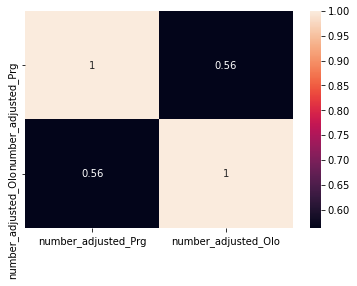

In [116]:
import seaborn as sn
corrMatrix = df_merged_clean.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [117]:
#drop lines with null values
df_merged_clean = df_merged_clean.dropna()
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,1.790409e-06,0.000004
1,8.952047e-07,0.000009
2,7.161637e-06,0.000004
3,3.580819e-06,0.000009
4,3.580819e-06,0.000052
5,1.074246e-05,0.000043
6,5.371228e-06,0.000026
7,1.074246e-05,0.000035
8,6.266433e-06,0.000060
9,1.342807e-05,0.000017


In [118]:
df_merged_clean.isnull().sum()

number_adjusted_Prg    0
number_adjusted_Olo    0
dtype: int64

In [119]:
import scipy.stats as stats
stats.pearsonr(df_merged_clean['number_adjusted_Prg'], df_merged_clean['number_adjusted_Olo'])

(0.5625833531129143, 1.3962669649280657e-16)

In [120]:
r_20201009 = 0.7521490476247261
p_20201009 = 1.0881912443295733e-29
r_20201011 = 0.8681118180495841
p_20201011 = 6.303139370072671e-50